In [111]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.fft import fft 
import matplotlib.pyplot as plt

## Data Processing

In [25]:
# Load and preprocess data
df = pd.read_csv('../22_HP/outputs/simulation_results_nand.csv')
df = df.drop(columns=['delay_LH_NodeA','delay_HL_NodeA','delay_LH_NodeB','delay_HL_NodeB'], axis=1)

In [26]:
df.head()

,Vin_A,Vin_B,temp,pvdd,cqload,lmin,wmin,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p,leakage
0,0.0,0.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,1.136609e-08
1,0.0,1.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,1.114162e-08
2,1.0,0.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,6.543595e-09
3,1.0,1.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,1.866817e-08
4,0.0,0.0,73.734086,0.936041,1.703362e-15,4.468047e-08,4.295989e-08,8.966653e-10,9.579161e-10,8.894931e-10,9.051161e-10,8.974949e-10,9.112459e-10,6.536598e-10,1.335243e-08,1.435760e-08,6.696820e+18,2.698271e+18,9.145988e-09


In [27]:
df.describe()

,Vin_A,Vin_B,temp,pvdd,cqload,lmin,wmin,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p,leakage
count,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04
mean,0.500000,0.500000,34.362600,0.999048,2.511981e-15,4.503877e-08,4.500441e-08,9.002687e-10,8.996303e-10,9.003235e-10,9.200230e-10,9.202474e-10,9.208007e-10,6.500293e-10,1.399542e-08,1.401062e-08,6.498297e+18,2.799952e+18,1.272208e-08
std,0.500006,0.500006,52.127050,0.058259,1.435116e-15,1.493685e-09,1.485418e-09,2.972510e-11,3.026050e-11,2.993862e-11,3.073110e-11,3.071142e-11,3.079464e-11,2.175375e-11,4.665974e-10,4.640081e-10,2.137011e+17,9.311797e+16,1.107019e-08
min,0.000000,0.000000,-54.986959,0.900033,1.035900e-17,4.015305e-08,3.938417e-08,7.666010e-10,7.602014e-10,7.868514e-10,7.979490e-10,8.003992e-10,8.051369e-10,5.724874e-10,1.173568e-08,1.244580e-08,5.739411e+18,2.435456e+18,4.540209e-10
25%,0.000000,0.000000,-10.844191,0.948592,1.256067e-15,4.403489e-08,4.397007e-08,8.805222e-10,8.795919e-10,8.801323e-10,8.994353e-10,8.997851e-10,9.000814e-10,6.354986e-10,1.368186e-08,1.369309e-08,6.352741e+18,2.736722e+18,6.125763e-09
50%,0.500000,0.500000,33.830185,0.998653,2.520102e-15,4.504623e-08,4.502020e-08,9.004051e-10,8.998323e-10,9.005850e-10,9.199003e-10,9.201744e-10,9.208642e-10,6.498078e-10,1.399949e-08,1.400450e-08,6.497865e+18,2.801193e+18,9.706318e-09
75%,1.000000,1.000000,79.692719,1.049947,3.755893e-15,4.603464e-08,4.600447e-08,9.199819e-10,9.201116e-10,9.205995e-10,9.404933e-10,9.408495e-10,9.417332e-10,6.647795e-10,1.431343e-08,1.431982e-08,6.641405e+18,2.862151e+18,1.542349e-08
max,1.000000,1.000000,124.996031,1.099992,4.999631e-15,5.073782e-08,5.021168e-08,1.014954e-09,1.014115e-09,1.011088e-09,1.032195e-09,1.033069e-09,1.043273e-09,7.428602e-10,1.579761e-08,1.582100e-08,7.419051e+18,3.151342e+18,1.283613e-07


In [28]:
df.dtypes

Vin_A       float64
Vin_B       float64
temp        float64
pvdd        float64
cqload      float64
lmin        float64
wmin        float64
toxe_n      float64
toxm_n      float64
toxref_n    float64
toxe_p      float64
toxm_p      float64
toxref_p    float64
toxp_par    float64
xj_n        float64
xj_p        float64
ndep_n      float64
ndep_p      float64
leakage     float64
dtype: object

In [29]:
# split into input (X) and output (y) variables
x = df.drop(columns=['leakage'], axis=1).values
y = df['leakage'].values

## Training and Testing

In [30]:
def train_and_test(model, x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return mse, r2

**Non-linear Relationships:** The dataset may contain non-linear relationships between input features
and target variables (leakage and delay) with influencing factors like temperature, voltage, and load conditions. 

**Continuous Target Variable:** Leakage power is a continuous value, making regression models suitable for prediction.

**Robustness**: They are robust to outliers and noise in the data, which might be present in real-world
datasets like the one under consideration.

Gradient Boosting models excel at capturing these non-linear relationships by building ensembles of weak decision trees, progressively improving predictions with each iteration.


### Linear Regression

In [31]:
def train_and_test_linear_reg(x, y):
  
  model = LinearRegression()
  return train_and_test(model, x, y)

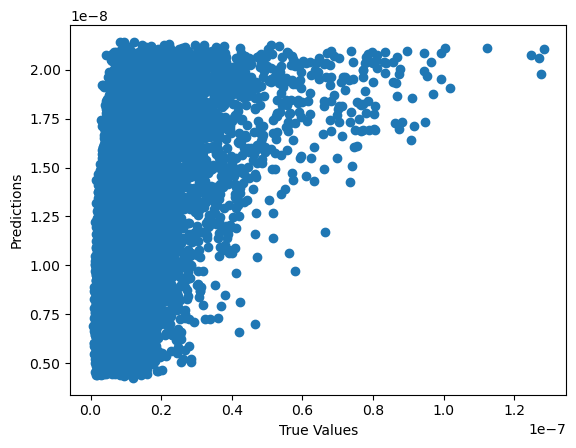

MSE: 1.0152560995228213e-16, R2: 0.17471412277385678


In [112]:
def train_and_test_lr(x, y):
    model = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #plot
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

    return mse, r2

mse, r2 = train_and_test_lr(x, y)
print(f'MSE: {mse}, R2: {r2}')


### Adaboost

In [32]:
from sklearn.ensemble import AdaBoostRegressor

def train_and_test_adaboost(x, y):

  model = AdaBoostRegressor(random_state=42)
  return train_and_test(model, x, y)

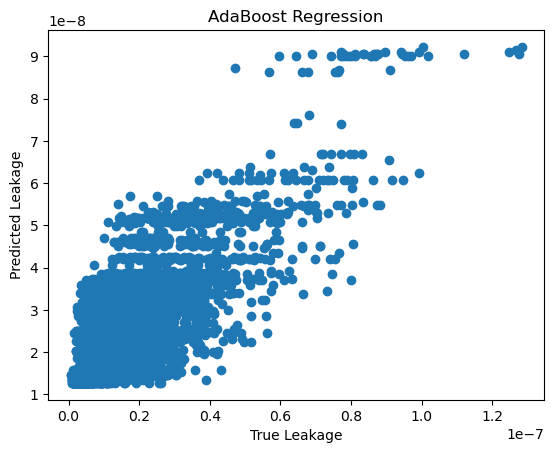

MSE: 1.3638890430300284e-16, R2: -0.10868416929009572


In [110]:
def train_and_test_ab(x,y):
    model = AdaBoostRegressor(random_state=42)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Leakage')
    plt.ylabel('Predicted Leakage')
    plt.title('AdaBoost Regression')
    plt.show()

    return mse, r2

mse, r2 = train_and_test_ab(x, y)
print(f'MSE: {mse}, R2: {r2}')




### XGBoost

In [33]:
import xgboost as xgb

def train_and_test_xgboost(x, y):
      
    model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                  max_depth = 5, alpha = 10, n_estimators = 10)
    return train_and_test(model, x, y)

mse_xg, r2_xg = train_and_test_xgboost(x, y)
print("\nXGBoost Model Performance:")
print("Mean Squared Error:", mse_xg)
print("R2 Score:", r2_xg)


XGBoost Model Performance:
Mean Squared Error: 1.230189438563328e-16
R2 Score: -1.8423294894098774e-06


### LightGBM

In [108]:
def train_and_test_lightgbm(x, y):
      
    model = lgb.LGBMRegressor()
    return train_and_test(model, x, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4084
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000


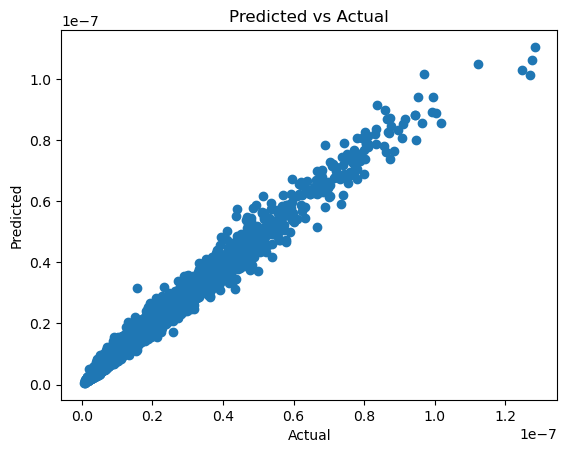

In [107]:

import lightgbm as lgb
import matplotlib.pyplot as plt

def train_and_test_lgbm(x, y):
        
     model = lgb.LGBMRegressor()
     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

     model.fit(x_train, y_train)
     y_pred = model.predict(x_test)

     # plot pred vs actual 
     plt.scatter(y_test, y_pred)
     plt.xlabel('Actual')
     plt.ylabel('Predicted')
     plt.title('Predicted vs Actual')
     plt.show()

     mse = mean_squared_error(y_test, y_pred)
     r2 = r2_score(y_test, y_pred)
     return mse, r2

mse_lgb, r2_lgb = train_and_test_lgbm(x, y)

### Cat Boost Regressor

In [35]:
from catboost import CatBoostRegressor

def train_and_test_catboost(x, y):
    
  model = CatBoostRegressor(random_state=42) 
  return train_and_test(model, x, y)

Learning rate set to 0.069316
0:	learn: 0.0000000	total: 3.25ms	remaining: 3.25s
1:	learn: 0.0000000	total: 6.48ms	remaining: 3.23s
2:	learn: 0.0000000	total: 10.9ms	remaining: 3.61s
3:	learn: 0.0000000	total: 14.5ms	remaining: 3.6s
4:	learn: 0.0000000	total: 17ms	remaining: 3.38s
5:	learn: 0.0000000	total: 19.3ms	remaining: 3.21s
6:	learn: 0.0000000	total: 21.6ms	remaining: 3.06s
7:	learn: 0.0000000	total: 24ms	remaining: 2.97s
8:	learn: 0.0000000	total: 26.5ms	remaining: 2.92s
9:	learn: 0.0000000	total: 28.7ms	remaining: 2.85s
10:	learn: 0.0000000	total: 32.1ms	remaining: 2.88s
11:	learn: 0.0000000	total: 36ms	remaining: 2.96s
12:	learn: 0.0000000	total: 38.6ms	remaining: 2.93s
13:	learn: 0.0000000	total: 42.6ms	remaining: 3s
14:	learn: 0.0000000	total: 45.4ms	remaining: 2.98s
15:	learn: 0.0000000	total: 48.2ms	remaining: 2.96s
16:	learn: 0.0000000	total: 50.8ms	remaining: 2.94s
17:	learn: 0.0000000	total: 54.9ms	remaining: 3s
18:	learn: 0.0000000	total: 60ms	remaining: 3.1s
19:	lear

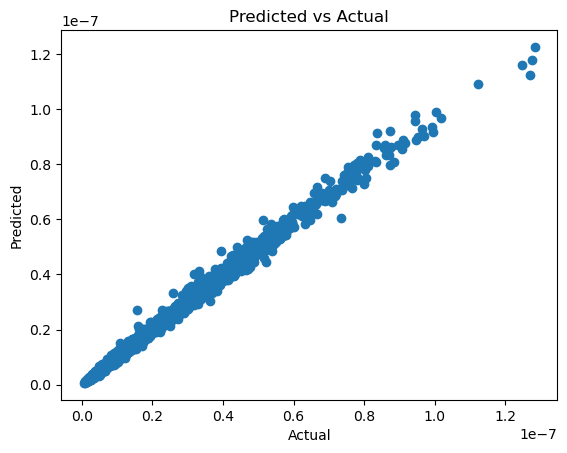

In [109]:
def train_and_test_cb(x, y):
    
  model = CatBoostRegressor(random_state=42) 
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # plot pred vs actual
  plt.scatter(y_test, y_pred)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Predicted vs Actual')
  plt.show()

  return mse, r2

mse_cb, r2_cb = train_and_test_cb(x, y)

### Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

def train_and_test_random_forest(x, y):
     
      model = RandomForestRegressor(random_state=42)
      return train_and_test(model, x, y)

mse_rf, r2_rf = train_and_test_random_forest(x, y)
print("\nRandom Forest Model Performance:")
print("Mean Squared Error:", mse_rf)
print("R2 Score:", r2_rf)


Random Forest Model Performance:
Mean Squared Error: 1.2301893370627395e-16
R2 Score: -1.7598212411762404e-06


In [37]:
mse_lr, r2_lr = train_and_test_linear_reg(x, y)
mse_ada, r2_ada = train_and_test_adaboost(x, y)
mse_lgb, r2_lgb = train_and_test_lightgbm(x, y)
mse_catboost, r2_catboost = train_and_test_catboost(x, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4084
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 8.36ms	remaining: 8.35s
1:	learn: 0.0000000	total: 13ms	remaining: 6.47s
2:	learn: 0.0000000	total: 17.6ms	remaining: 5.84s
3:	learn: 0.0000000	total: 22.1ms	remaining: 5.51s
4:	learn: 0.0000000	total: 27ms	remaining: 5.38s
5:	learn: 0.0000000	total: 30.3ms	remaining: 5.02s
6:	learn: 0.0000000	total: 33.2ms	remaining: 4.71s
7:	learn: 0.0000000	total: 35.7ms	remaining: 4.42s
8:	learn: 0.0000000	total: 38.1ms	remaining: 4.19s
9:	learn: 0.0000000	total: 40.3ms	remaining: 3.99s
10:	learn: 0.0000000	total: 44.2ms	remaining: 3.97s
11:	learn: 0.0000000	total: 49.8ms	remaining: 4.1s
12:	learn: 0.000000

In [120]:
print("Model Performance Before Transformation\n")

print("Linear Regression Model Performance:")
print("Mean Squared Error:", mse_lr)
print("R2 Score:", r2_lr)

print("\nAdaBoost Model Performance:")
print("Mean Squared Error:", mse_ada)
print("R2 Score:", r2_ada)

print("\nLightGBM Model Performance:")
print("Mean Squared Error:", mse_lgb)
print("R2 Score:", r2_lgb)

print("\nCatBoost Model Performance:")
print("Mean Squared Error:", mse_catboost)
print("R2 Score:", r2_catboost)

r2_scores_no_transformation = [r2_lr, r2_ada, r2_lgb, r2_catboost] 
mse_scores_no_transformation = [mse_lr, mse_ada, mse_lgb, mse_catboost]
model_names = ['Linear Regression', 'AdaBoost', 'LightGBM', 'CatBoost']

Model Performance Before Transformation

Linear Regression Model Performance:
Mean Squared Error: 1.0152560995228213e-16
R2 Score: 0.17471412277385678

AdaBoost Model Performance:
Mean Squared Error: 1.3638890430300284e-16
R2 Score: -0.10868416929009572

LightGBM Model Performance:
Mean Squared Error: 2.2366763187613596e-18
R2 Score: 0.9818184064230937

CatBoost Model Performance:
Mean Squared Error: 5.269388109071569e-19
R2 Score: 0.995716596442923


## Transformations

In [121]:
def plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_transformation, model_names, transformation_name):

    model_indices = range(len(model_names))
    plt.figure(figsize=(12, 8))
    for i, model_name in enumerate(model_names, start=1):
        plt.subplot(2, 2, i)
        plt.plot(model_indices, r2_scores_no_transformation, marker='o', color='blue', label='Without Transformation')
        plt.plot(model_indices, r2_scores_with_transformation, marker='o', color='green', label=f'With {transformation_name} Transformation')
        plt.title(model_name)
        plt.xlabel('Models')
        plt.ylabel('R2 Score')
        plt.xticks(model_indices, model_names, rotation=45)
        plt.legend()

    plt.tight_layout()
    plt.show()



### FFT

In [39]:
def apply_fft(x):
  x_transformed = np.zeros_like(x)
  for i, row in enumerate(x):
    x_transformed[i] = np.abs(fft(row))  
  return x_transformed

# Apply FFT to the input data
x_fft = apply_fft(x)
y_fft = apply_fft(y.reshape(-1, 1))

In [40]:
mse_lr_fft, r2_lr_fft = train_and_test_linear_reg(x_fft, y)
mse_ada_fft, r2_ada_fft = train_and_test_adaboost(x_fft, y)
mse_lgb_fft, r2_lgb_fft = train_and_test_lightgbm(x_fft, y)
mse_catboost_fft, r2_catboost_fft = train_and_test_catboost(x_fft, y)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 4.98ms	remaining: 4.98s
1:	learn: 0.0000000	total: 8.75ms	remaining: 4.36s
2:	learn: 0.0000000	total: 12.2ms	remaining: 4.07s
3:	learn: 0.0000000	total: 16.9ms	remaining: 4.21s
4:	learn: 0.0000000	total: 21.6ms	remaining: 4.29s
5:	learn: 0.0000000	total: 26.6ms	remaining: 4.4s
6:	learn: 0.0000000	total: 30.7ms	remaining: 4.36s
7:	learn: 0.0000000	total: 33.5ms	remaining: 4.16s
8:	learn: 0.0000000	total: 38.5ms	remaining: 4.24s
9:	learn: 0.0000000	total: 43.3ms	remaining: 4.28s
10:	learn: 0.0000000	total: 46.7ms	remaining: 4.2s
11:	learn: 0.0000000	total: 49ms	remaining: 4.04s
12:	learn: 0.00000

In [118]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_fft)
print("  R2 Score:", r2_lr_fft)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_fft)
print("  R2 Score:", r2_ada_fft)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_fft)
print("  R2 Score:", r2_lgb_fft)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_fft)
print("  R2 Score:", r2_catboost_fft)

r2_scores_with_fft = [r2_lr_fft, r2_ada_fft, r2_lgb_fft, r2_catboost_fft]  
mse_scores_with_fft = [mse_lr_fft, mse_ada_fft, mse_lgb_fft, mse_catboost_fft]


Linear Regression:
  Mean Squared Error: 1.2202793894170019e-16
  R2 Score: 0.008053882336359952

AdaBoost:
  Mean Squared Error: 2.2133354654511863e-16
  R2 Score: -0.799185941418278

LightGBM:
  Mean Squared Error: 1.2146094338284297e-16
  R2 Score: 0.012662900961263879

CatBoost:
  Mean Squared Error: 1.216969468671236e-16
  R2 Score: 0.010744465379891599


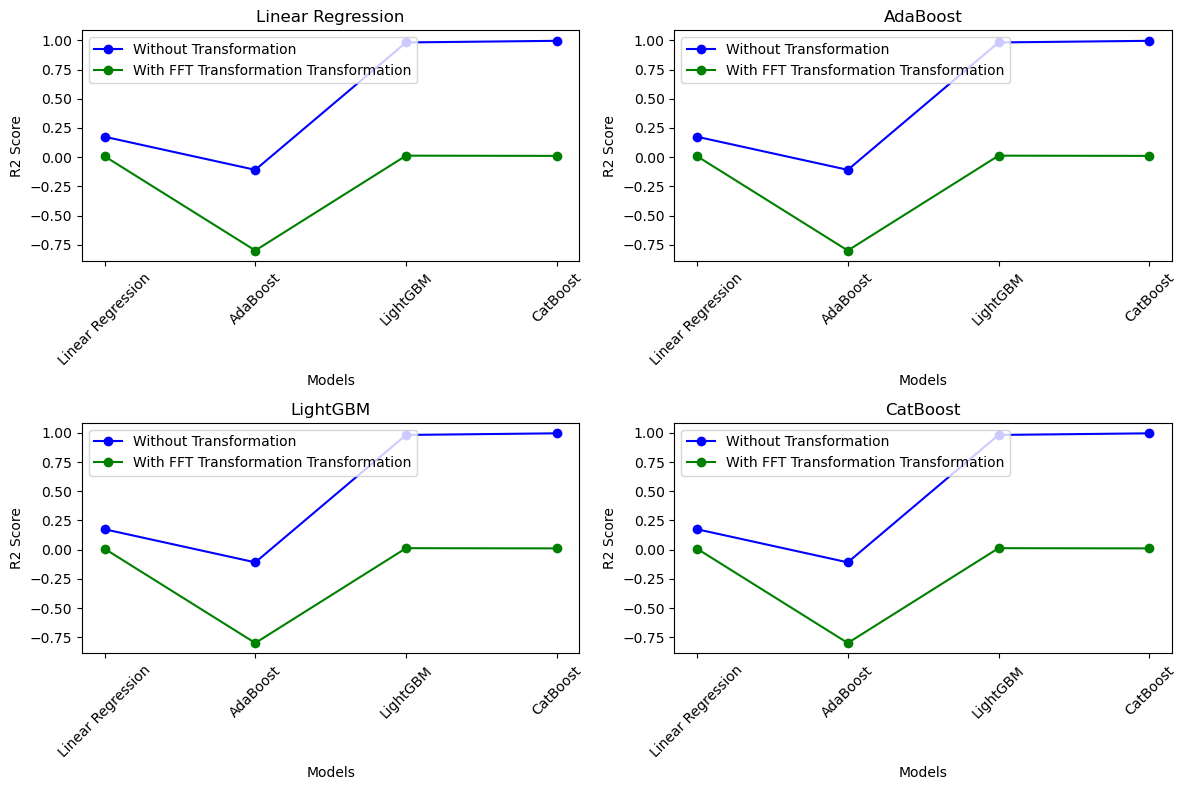

In [122]:
# Plot R2 scores for models with the 'FFT' transformation
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_fft, model_names, "FFT Transformation")


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# square root of the sum of the squares of the real and imaginary parts of the FFT
def fft_magnitude(x):
    return np.sqrt(np.sum(np.abs(fft(x))**2))

x_scaled = scaler.fit_transform(df.drop('leakage', axis=1).values)
# apply the FFT to each row of the input data
x_fft = np.apply_along_axis(fft_magnitude, 1, x_scaled)

In [43]:
mse_lr_fft, r2_lr_fft = train_and_test_linear_reg(x_fft.reshape(-1, 1), y)
mse_ada_fft, r2_ada_fft = train_and_test_adaboost(x_fft.reshape(-1, 1), y)
mse_lgb_fft, r2_lgb_fft = train_and_test_lightgbm(x_fft.reshape(-1, 1), y)
mse_catboost_fft, r2_catboost_fft = train_and_test_catboost(x_fft.reshape(-1, 1), y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 1
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 1.85ms	remaining: 1.85s
1:	learn: 0.0000000	total: 3.73ms	remaining: 1.86s
2:	learn: 0.0000000	total: 6ms	remaining: 2s
3:	learn: 0.0000000	total: 8.07ms	remaining: 2.01s
4:	learn: 0.0000000	total: 9.68ms	remaining: 1.93s
5:	learn: 0.0000000	total: 11.9ms	remaining: 1.98s
6:	learn: 0.0000000	total: 13.9ms	remaining: 1.98s
7:	learn: 0.0000000	total: 15.5ms	remaining: 1.92s
8:	learn: 0.0000000	total: 17.3ms	remaining: 1.91s
9:	learn: 0.0000000	total: 19.1ms	remaining: 1.89s
10:	learn: 0.0000000	total: 21.1ms	remaining: 1.9s
11:	learn: 

In [44]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_fft)
print("  R2 Score:", r2_lr_fft)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_fft)
print("  R2 Score:", r2_ada_fft)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_fft)
print("  R2 Score:", r2_lgb_fft)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_fft)
print("  R2 Score:", r2_catboost_fft)

Linear Regression:
  Mean Squared Error: 1.2202793894170019e-16
  R2 Score: 0.008053882336359952

AdaBoost:
  Mean Squared Error: 2.2133354654511863e-16
  R2 Score: -0.799185941418278

LightGBM:
  Mean Squared Error: 1.2146094338284297e-16
  R2 Score: 0.012662900961263879

CatBoost:
  Mean Squared Error: 1.216969468671236e-16
  R2 Score: 0.010744465379891599


### PCA

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  
x_pca = pca.fit_transform(x_scaled)

In [46]:
mse_lr_pca, r2_lr_pca = train_and_test_linear_reg(x_pca, y)
mse_ada_pca, r2_ada_pca = train_and_test_adaboost(x_pca, y)
mse_lgb_pca, r2_lgb_pca = train_and_test_lightgbm(x_pca, y)
mse_catboost_pca, r2_catboost_pca = train_and_test_catboost(x_pca, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 4.47ms	remaining: 4.47s
1:	learn: 0.0000000	total: 7.53ms	remaining: 3.75s
2:	learn: 0.0000000	total: 10.4ms	remaining: 3.45s
3:	learn: 0.0000000	total: 14.7ms	remaining: 3.65s
4:	learn: 0.0000000	total: 18.8ms	remaining: 3.75s
5:	learn: 0.0000000	total: 22.5ms	remaining: 3.72s
6:	learn: 0.0000000	total: 25ms	remaining: 3.55s
7:	learn: 0.0000000	total: 27.6ms	remaining: 3.42s
8:	learn: 0.0000000	total: 30.8ms	remaining: 3.39s
9:	learn: 0.0000000	total: 33.3ms	remaining: 3.29s
10:	learn: 0.0000000	total: 36.5ms	remaining: 3.28s
11:	learn: 0.0000000	total: 39.8ms	remaining: 3.28s
12:	learn: 0.000

In [139]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_pca)
print("  R2 Score:", r2_lr_pca)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_pca)
print("  R2 Score:", r2_ada_pca)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_pca)
print("  R2 Score:", r2_lgb_pca)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_pca)
print("  R2 Score:", r2_catboost_pca)

# R2 scores for models with the 'PCA' transformation
r2_scores_with_pca = [r2_lr_pca, r2_ada_pca, r2_lgb_pca, r2_catboost_pca]
mse_scores_with_pca = [mse_lr_pca, mse_ada_pca, mse_lgb_pca, mse_catboost_pca]

Linear Regression:
  Mean Squared Error: 5.759237526350362e-17
  R2 Score: 0.531840547786737

AdaBoost:
  Mean Squared Error: 1.5266108794433766e-16
  R2 Score: -0.24095821676575957

LightGBM:
  Mean Squared Error: 1.7609384616289533e-17
  R2 Score: 0.8568560539818714

CatBoost:
  Mean Squared Error: 1.1246723857309819e-17
  R2 Score: 0.908577132716931


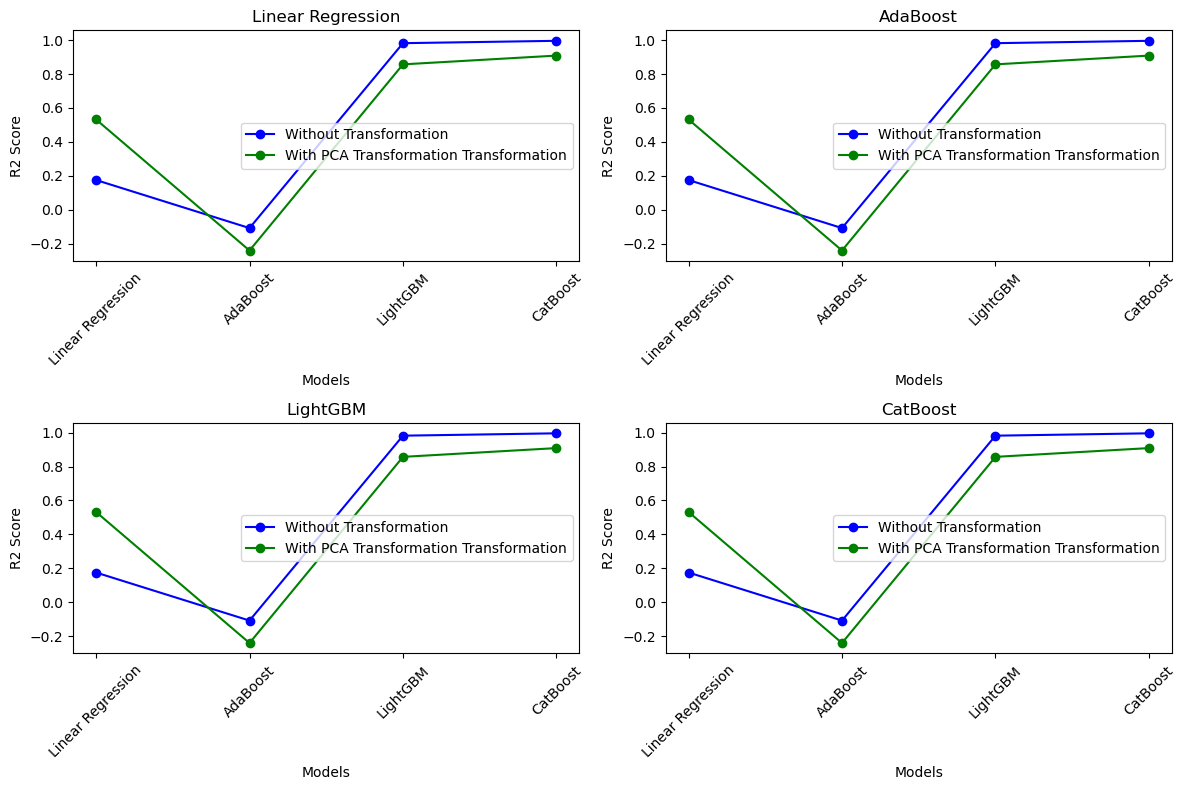

In [123]:
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_pca, model_names, "PCA Transformation")

### Quantile Transformer

This transformation scales features to a specific range (often 0-1) based on quantiles. It preserves the distribution of the data more closely compared to scaling techniques like StandardScaler.

Applications: Useful for models sensitive to feature scaling or when you want to ensure features fall within a specific range. It can also be helpful for dealing with skewed data distributions.

In [48]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='uniform')  
x_qt = transformer.fit_transform(x)

In [49]:
mse_lr_qt, r2_lr_qt = train_and_test_linear_reg(x_qt, y)
mse_ada_qt, r2_ada_qt = train_and_test_adaboost(x_qt, y)
mse_lgb_qt, r2_lgb_qt = train_and_test_lightgbm(x_qt, y)
mse_catboost_qt, r2_catboost_qt = train_and_test_catboost(x_qt, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4084
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 5.52ms	remaining: 5.51s
1:	learn: 0.0000000	total: 9.49ms	remaining: 4.73s
2:	learn: 0.0000000	total: 15.1ms	remaining: 5.01s
3:	learn: 0.0000000	total: 19.5ms	remaining: 4.85s
4:	learn: 0.0000000	total: 22.1ms	remaining: 4.4s
5:	learn: 0.0000000	total: 26.2ms	remaining: 4.34s
6:	learn: 0.0000000	total: 29.5ms	remaining: 4.19s
7:	learn: 0.0000000	total: 33.6ms	remaining: 4.17s
8:	learn: 0.0000000	total: 36.5ms	remaining: 4.02s
9:	learn: 0.0000000	total: 38.6ms	remaining: 3.83s
10:	learn: 0.0000000	total: 41.9ms	remaining: 3.77s
11:	learn: 0.0000000	total: 45.3ms	remaining: 3.73s
12:	learn: 0.00

In [124]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_qt)
print("  R2 Score:", r2_lr_qt)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_qt)
print("  R2 Score:", r2_ada_qt)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_qt)
print("  R2 Score:", r2_lgb_qt)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_qt)
print("  R2 Score:", r2_catboost_qt)

# R2 scores for models with the 'QuantileTransformer' transformation
r2_scores_with_qt = [r2_lr_qt, r2_ada_qt, r2_lgb_qt, r2_catboost_qt]
mse_scores_with_qt = [mse_lr_qt, mse_ada_qt, mse_lgb_qt, mse_catboost_qt]


Linear Regression:
  Mean Squared Error: 5.883093117648576e-17
  R2 Score: 0.5217725195954311

AdaBoost:
  Mean Squared Error: 1.0165373139399671e-16
  R2 Score: 0.173672643520823

LightGBM:
  Mean Squared Error: 2.2589823911029757e-18
  R2 Score: 0.981637083833763

CatBoost:
  Mean Squared Error: 5.201129065305277e-19
  R2 Score: 0.9957720831569056


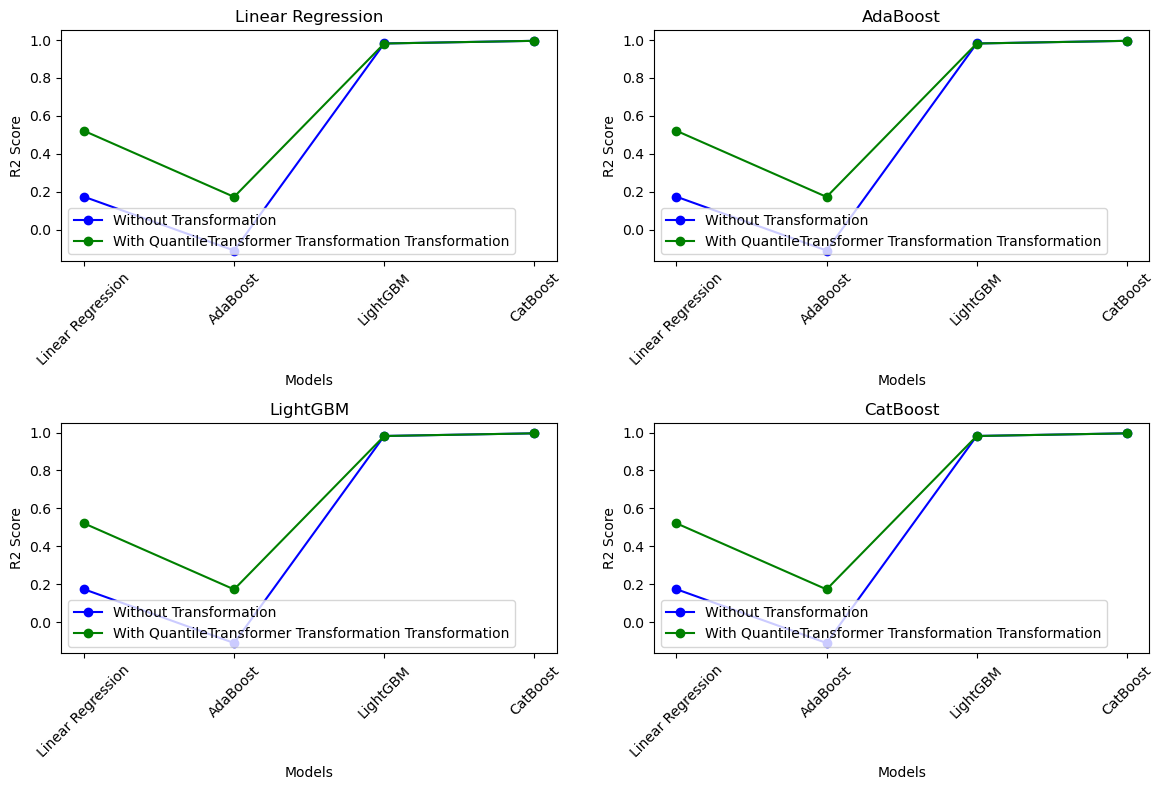

In [125]:
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_qt, model_names, "QuantileTransformer Transformation")

### Scaling

StandardScaler removes the mean and scales each feature/variable to unit variance. Scaled values will be close to 1 and -1.

In [51]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop('leakage', axis=1).values)
y_scaled = scaler.fit_transform(df['leakage'].values.reshape(-1, 1))
x_scaled

array([[-1.        , -1.        ,  0.18078805, ...,  0.72033654,
         0.14908407, -0.5150728 ],
       [-1.        ,  1.        ,  0.18078805, ...,  0.72033654,
         0.14908407, -0.5150728 ],
       [ 1.        , -1.        ,  0.18078805, ...,  0.72033654,
         0.14908407, -0.5150728 ],
       ...,
       [-1.        ,  1.        ,  1.0950481 , ...,  1.6576675 ,
        -1.23959102,  1.93594467],
       [ 1.        , -1.        ,  1.0950481 , ...,  1.6576675 ,
        -1.23959102,  1.93594467],
       [ 1.        ,  1.        ,  1.0950481 , ...,  1.6576675 ,
        -1.23959102,  1.93594467]])

In [52]:
mse_lr_ss, r2_lr_ss = train_and_test_linear_reg(x_scaled, y)
mse_ada_ss, r2_ada_ss = train_and_test_adaboost(x_scaled, y)
mse_lgb_ss, r2_lgb_ss = train_and_test_xgboost(x_scaled, y)
mse_catboost_ss, r2_catboost_ss = train_and_test_catboost(x_scaled, y)

Learning rate set to 0.069316
0:	learn: 0.0000000	total: 4.35ms	remaining: 4.35s
1:	learn: 0.0000000	total: 8.04ms	remaining: 4.01s
2:	learn: 0.0000000	total: 12.3ms	remaining: 4.08s
3:	learn: 0.0000000	total: 17.1ms	remaining: 4.26s
4:	learn: 0.0000000	total: 20.4ms	remaining: 4.05s
5:	learn: 0.0000000	total: 25.8ms	remaining: 4.27s
6:	learn: 0.0000000	total: 29.6ms	remaining: 4.2s
7:	learn: 0.0000000	total: 33.4ms	remaining: 4.14s
8:	learn: 0.0000000	total: 35.9ms	remaining: 3.95s
9:	learn: 0.0000000	total: 41.1ms	remaining: 4.07s
10:	learn: 0.0000000	total: 47ms	remaining: 4.22s
11:	learn: 0.0000000	total: 50.2ms	remaining: 4.13s
12:	learn: 0.0000000	total: 52.5ms	remaining: 3.98s
13:	learn: 0.0000000	total: 55.1ms	remaining: 3.88s
14:	learn: 0.0000000	total: 59.1ms	remaining: 3.88s
15:	learn: 0.0000000	total: 63ms	remaining: 3.88s
16:	learn: 0.0000000	total: 66ms	remaining: 3.82s
17:	learn: 0.0000000	total: 68.5ms	remaining: 3.74s
18:	learn: 0.0000000	total: 72.4ms	remaining: 3.74s

In [127]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_ss)
print("  R2 Score:", r2_lr_ss)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_ss)
print("  R2 Score:", r2_ada_ss)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_ss)
print("  R2 Score:", r2_lgb_ss)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_ss)
print("  R2 Score:", r2_catboost_ss)

# R2 scores for models with the 'StandardScaler' transformation
r2_scores_with_ss = [r2_lr_ss, r2_ada_ss, r2_lgb_ss, r2_catboost_ss]
mse_scores_with_ss = [mse_lr_ss, mse_ada_ss, mse_lgb_ss, mse_catboost_ss]


Linear Regression:
  Mean Squared Error: 5.759237526350362e-17
  R2 Score: 0.531840547786737

AdaBoost:
  Mean Squared Error: 1.0392358876195854e-16
  R2 Score: 0.1552213263607778

LightGBM:
  Mean Squared Error: 1.230189438563328e-16
  R2 Score: -1.8423294894098774e-06

CatBoost:
  Mean Squared Error: 5.201129065305277e-19
  R2 Score: 0.9957720831569056


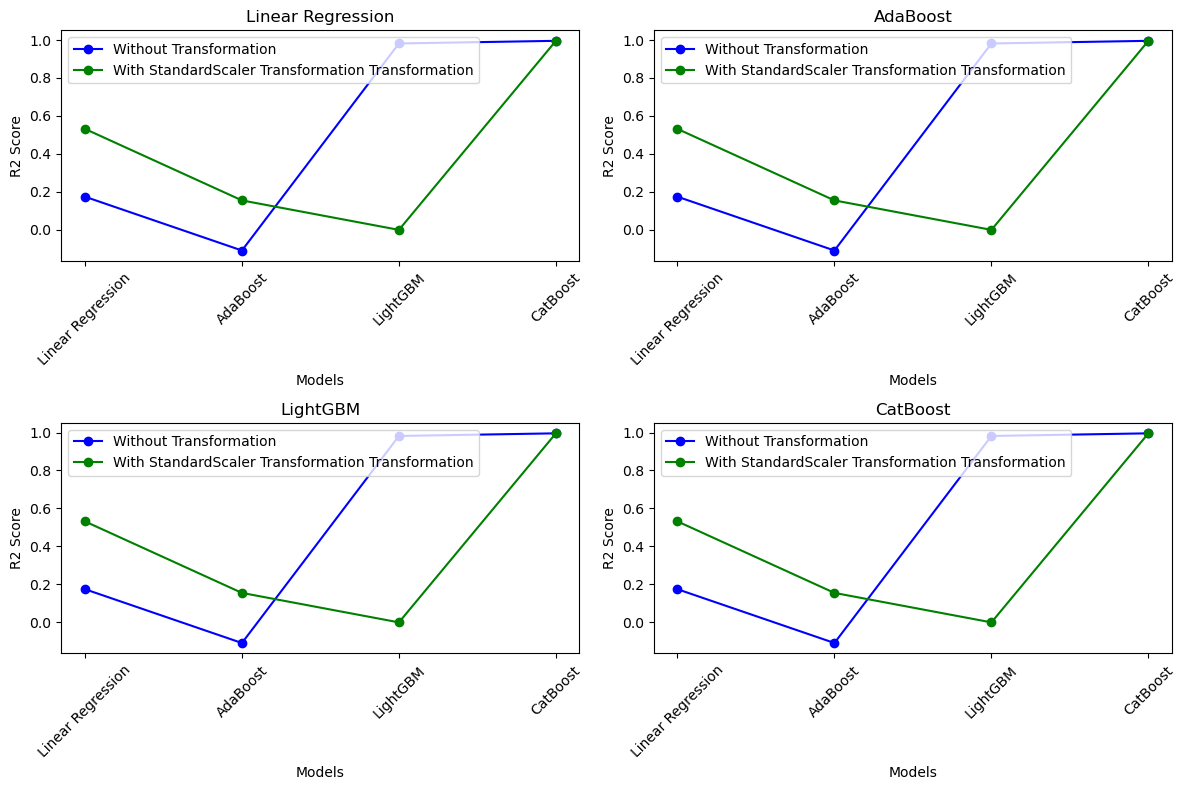

In [128]:
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_ss, model_names, "StandardScaler Transformation")


### Inverse Transform


In [88]:
def train_and_test_invt(model, x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  # y_pred = scaler.fit_transform(y_pred.reshape(-1, 1))
  y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return mse, r2

In [89]:
mse_lr_inv, r2_lr_inv = train_and_test_invt(LinearRegression(), x_scaled, y_scaled)
mse_ada_inv, r2_ada_inv = train_and_test_invt(AdaBoostRegressor(random_state=42), x_scaled, y_scaled)
mse_lgb_inv, r2_lgb_inv = train_and_test_invt(lgb.LGBMRegressor(), x_scaled, y_scaled)
mse_catboost_inv, r2_catboost_inv = train_and_test_invt(CatBoostRegressor(random_state=42), x_scaled, y_scaled)

/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4086
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000408
Learning rate set to 0.069316
0:	learn: 0.9500086	total: 3.42ms	remaining: 3.42s
1:	learn: 0.9046507	total: 8.47ms	remaining: 4.23s
2:	learn: 0.8642447	total: 11.3ms	remaining: 3.77s
3:	learn: 0.8256707	total: 15.6ms	remaining: 3.89s
4:	learn: 0.7902398	total: 21.3ms	remaining: 4.25s
5:	learn: 0.7572786	total: 26ms	remaining: 4.3s
6:	learn: 0.7261827	total: 28.5ms	remaining: 4.04s
7:	learn: 0.6980546	total: 34.4ms	remaining: 4.27s
8:	learn: 0.6710851	total: 40.1ms	remaining: 4.42s
9:	learn: 0.6486568	total: 42.9ms	remaining: 4.25s
10:	learn: 0.6241152	total: 45.4ms	remaining: 4.08s
11:	learn: 0.6018596	total: 47.7ms	remaining: 3.93s
12:	learn: 0.5832

In [129]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_inv)
print("  R2 Score:", r2_lr_inv)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_inv)
print("  R2 Score:", r2_ada_inv)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_inv)
print("  R2 Score:", r2_lgb_inv)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_inv)
print("  R2 Score:", r2_catboost_inv)

# R2 scores for models with the 'StandardScaler' transformation
r2_scores_with_inv = [r2_lr_inv, r2_ada_inv, r2_lgb_inv, r2_catboost_inv]
mse_scores_with_inv = [mse_lr_inv, mse_ada_inv, mse_lgb_inv, mse_catboost_inv]


Linear Regression:
  Mean Squared Error: 0.4700424339847937
  R2 Score: 0.531763569300379

AdaBoost:
  Mean Squared Error: 0.90534044035732
  R2 Score: 0.09813807071161462

LightGBM:
  Mean Squared Error: 0.017804752116
  R2 Score: 0.9822636575391466

CatBoost:
  Mean Squared Error: 0.004375873585215463
  R2 Score: 0.9956409394544146


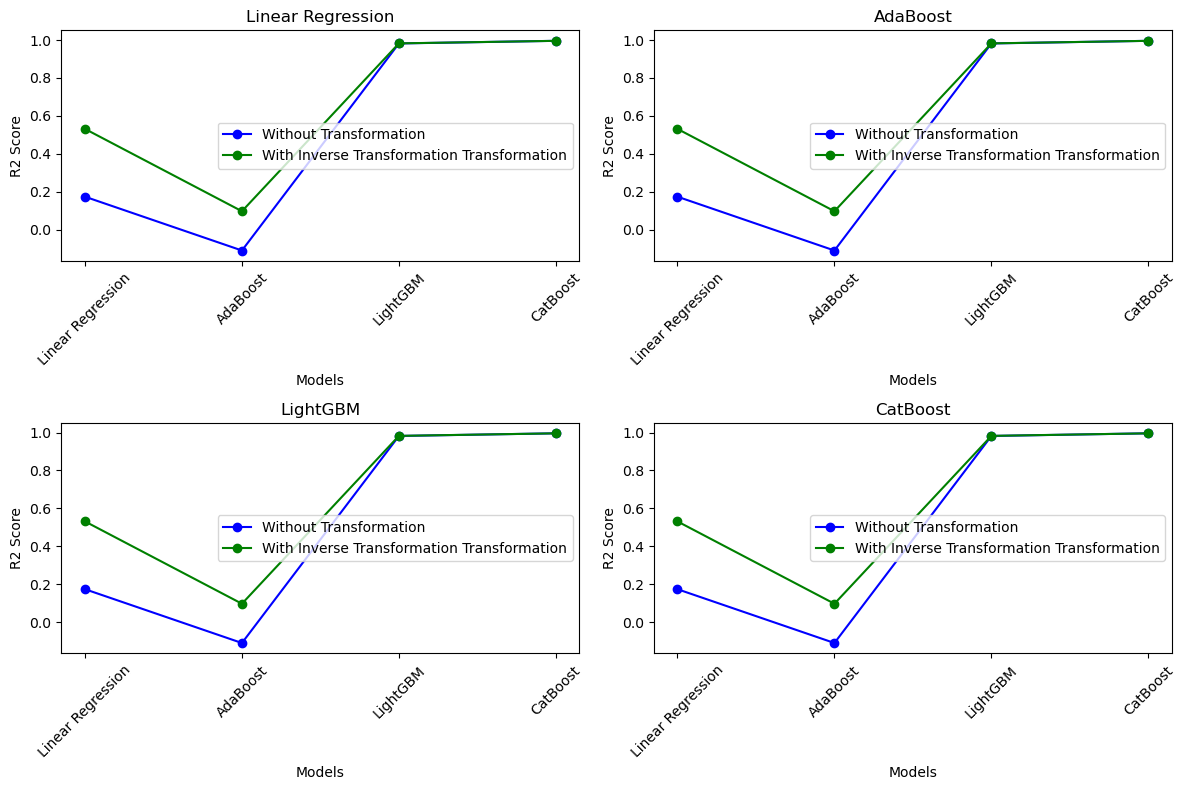

In [130]:
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_inv, model_names, "Inverse Transformation")

### Yeo johnson transformation

Yeo Johnson’s transformations technique can be applied to zero and negative values as well. So we apply this on scaled data. Advanced form of box cox transformations technique - boxcox cannot be applied because 0 can also be one of the values in the dataset, but only possible values are allowed for this transformation.

In [64]:
# yeo johnson transformation
from scipy.stats import yeojohnson

x_yeo = np.zeros_like(x_scaled)
for i in range(x_scaled.shape[1]):
    x_yeo[:, i], _ = yeojohnson(x_scaled[:, i]) 


In [69]:
mse_lr_yeo, r2_lr_yeo = train_and_test_linear_reg(x_yeo, y)
mse_ada_yeo, r2_ada_yeo = train_and_test_adaboost(x_yeo, y)
mse_lgb_yeo, r2_lgb_yeo = train_and_test_lightgbm(x_yeo, y)
mse_catboost_yeo, r2_catboost_yeo = train_and_test_catboost(x_yeo, y)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4086
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 3.7ms	remaining: 3.69s
1:	learn: 0.0000000	total: 6.64ms	remaining: 3.31s
2:	learn: 0.0000000	total: 9.11ms	remaining: 3.03s
3:	learn: 0.0000000	total: 12.3ms	remaining: 3.06s
4:	learn: 0.0000000	total: 19.1ms	remaining: 3.81s
5:	learn: 0.0000000	total: 22.4ms	remaining: 3.71s
6:	learn: 0.0000000	total: 25.1ms	remaining: 3.57s
7:	learn: 0.0000000	total: 28.1ms	remaining: 3.48s
8:	learn: 0.0000000	total: 31.3ms	remaining: 3.45s
9:	learn: 0.0000000	total: 34ms	remaining: 3.37s
10:	learn: 0.0000000	total: 37.3ms	remaining: 3.36s
11:	learn: 0.0000000	total: 47.4ms	remaining: 3.9s
12:	learn: 0.00000

In [131]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_yeo)
print("  R2 Score:", r2_lr_yeo)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_yeo)
print("  R2 Score:", r2_ada_yeo)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_yeo)
print("  R2 Score:", r2_lgb_yeo)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_yeo)
print("  R2 Score:", r2_catboost_yeo)

# R2 scores for models with the 'Yeo-Johnson' transformation
r2_scores_with_yeo = [r2_lr_yeo, r2_ada_yeo, r2_lgb_yeo, r2_catboost_yeo]
mse_scores_with_yeo = [mse_lr_yeo, mse_ada_yeo, mse_lgb_yeo, mse_catboost_yeo]

Linear Regression:
  Mean Squared Error: 5.775241508932566e-17
  R2 Score: 0.5305396089585266

AdaBoost:
  Mean Squared Error: 1.0392358876195854e-16
  R2 Score: 0.1552213263607778

LightGBM:
  Mean Squared Error: 2.142238113212887e-18
  R2 Score: 0.9825860798933281

CatBoost:
  Mean Squared Error: 5.201129065305277e-19
  R2 Score: 0.9957720831569056


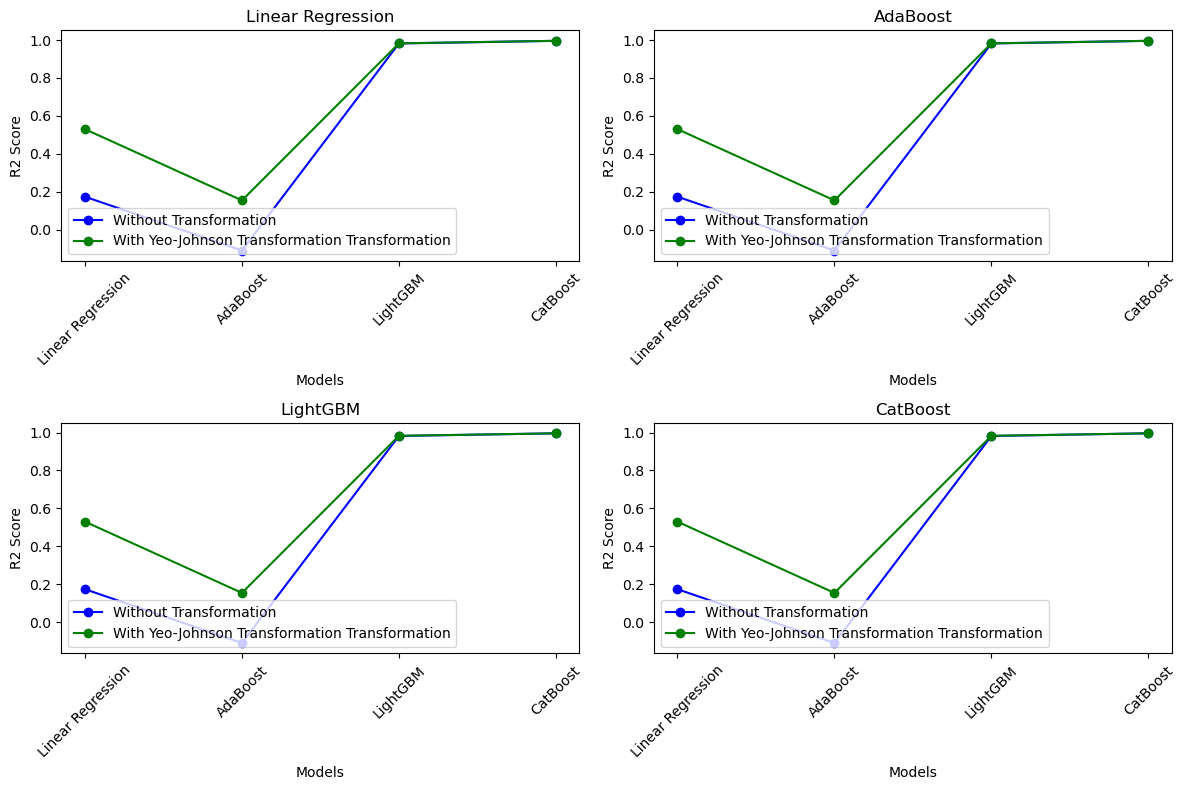

In [132]:
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_yeo, model_names, "Yeo-Johnson Transformation")


### Power Transformer

This transformation is similar to Yeo-Johnson but offers more flexibility and can handle a wider range of data distributions. It automatically finds the optimal lambda parameter for the transformation, which can be more convenient than manually tuning it in Yeo-Johnson.

In [71]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()
x_powt = transformer.fit_transform(x_scaled)


In [72]:
mse_lr_powt, r2_lr_powt = train_and_test_linear_reg(x_powt, y)
mse_ada_powt, r2_ada_powt = train_and_test_adaboost(x_powt, y)
mse_lgb_powt, r2_lgb_powt = train_and_test_lightgbm(x_powt, y)
mse_catboost_powt, r2_catboost_powt = train_and_test_catboost(x_powt, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4086
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 4.95ms	remaining: 4.95s
1:	learn: 0.0000000	total: 10.2ms	remaining: 5.1s
2:	learn: 0.0000000	total: 13.6ms	remaining: 4.53s
3:	learn: 0.0000000	total: 18.5ms	remaining: 4.61s
4:	learn: 0.0000000	total: 22.1ms	remaining: 4.39s
5:	learn: 0.0000000	total: 26.1ms	remaining: 4.32s
6:	learn: 0.0000000	total: 28.9ms	remaining: 4.1s
7:	learn: 0.0000000	total: 31.8ms	remaining: 3.94s
8:	learn: 0.0000000	total: 35.6ms	remaining: 3.92s
9:	learn: 0.0000000	total: 39.9ms	remaining: 3.95s
10:	learn: 0.0000000	total: 42.5ms	remaining: 3.82s
11:	learn: 0.0000000	total: 44.7ms	remaining: 3.68s
12:	learn: 0.000

In [133]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_powt)
print("  R2 Score:", r2_lr_powt)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_powt)
print("  R2 Score:", r2_ada_powt)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_powt)
print("  R2 Score:", r2_lgb_powt)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_powt)
print("  R2 Score:", r2_catboost_powt)

# R2 scores for models with the 'PowerTransformer' transformation
r2_scores_with_powt = [r2_lr_powt, r2_ada_powt, r2_lgb_powt, r2_catboost_powt]
mse_scores_with_powt = [mse_lr_powt, mse_ada_powt, mse_lgb_powt, mse_catboost_powt]


Linear Regression:
  Mean Squared Error: 5.775241518665368e-17
  R2 Score: 0.5305396081673623

AdaBoost:
  Mean Squared Error: 1.0392358876195854e-16
  R2 Score: 0.1552213263607778

LightGBM:
  Mean Squared Error: 2.222869524059344e-18
  R2 Score: 0.9819306397077072

CatBoost:
  Mean Squared Error: 5.201129065305277e-19
  R2 Score: 0.9957720831569056


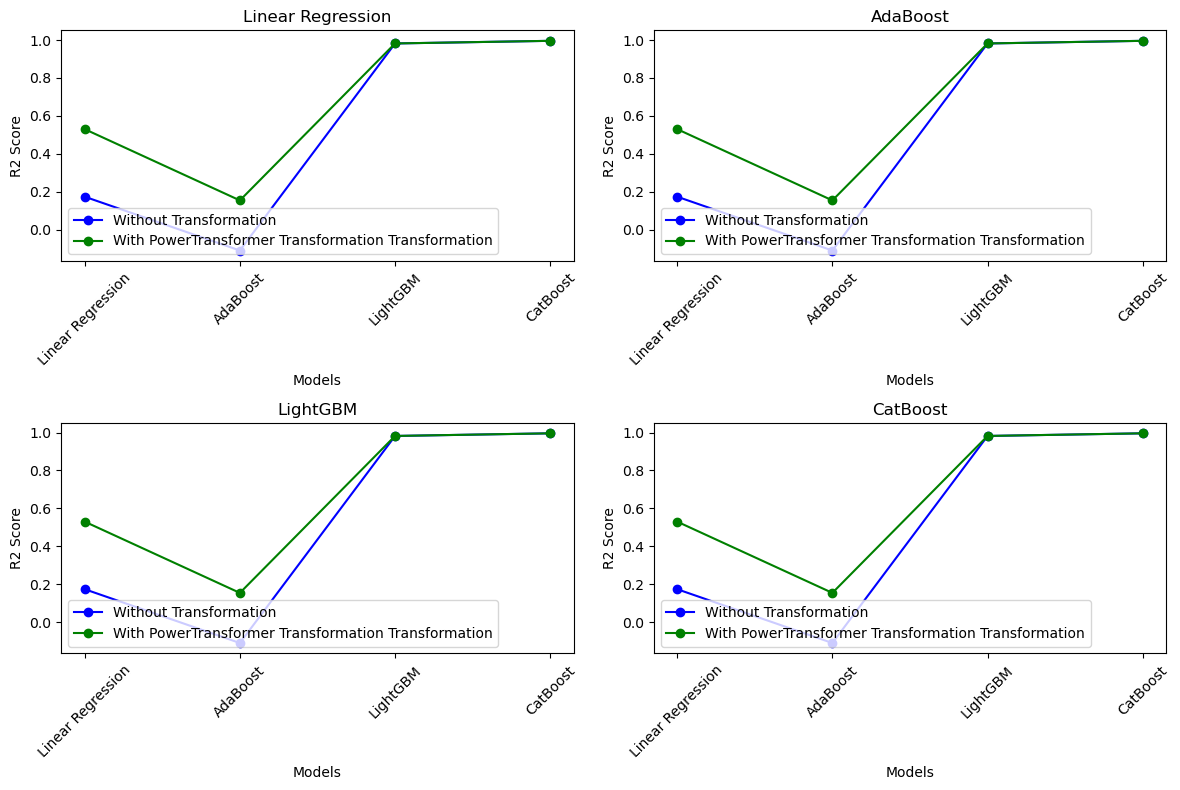

In [134]:
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_powt, model_names, "PowerTransformer Transformation")


#### Visualisation

In [141]:
# Models and transformations
models = ['Linear Regression', 'AdaBoost', 'LightGBM', 'CatBoost']
transformations = ['None', 'FFT', 'PCA','Inverse Transform' ,'Scaling','Quantile Transformer', 'Yeo-Johnson', 'Power Transformer']

# R2 scores for each model and transformation
r2_scores = [r2_scores_no_transformation, r2_scores_with_fft, r2_scores_with_pca, r2_scores_with_inv, r2_scores_with_ss, r2_scores_with_qt, r2_scores_with_yeo, r2_scores_with_powt]

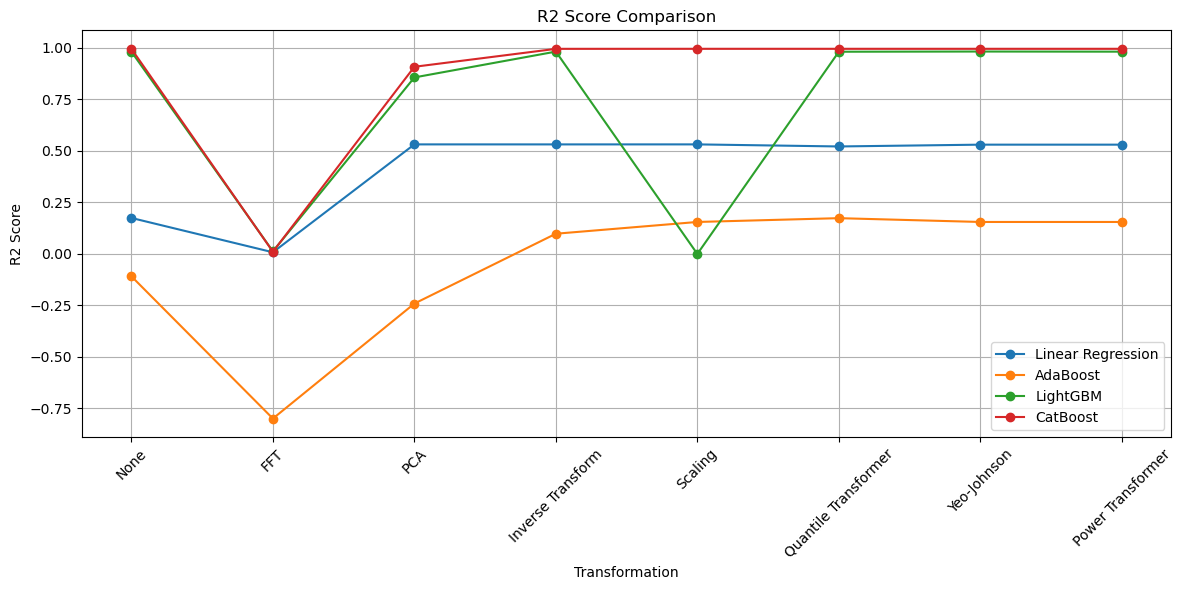

In [143]:
# Plotting R2 scores
plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    plt.plot(transformations, [scores[i] for scores in r2_scores], marker='o', label=model)

plt.title('R2 Score Comparison')
plt.xlabel('Transformation')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

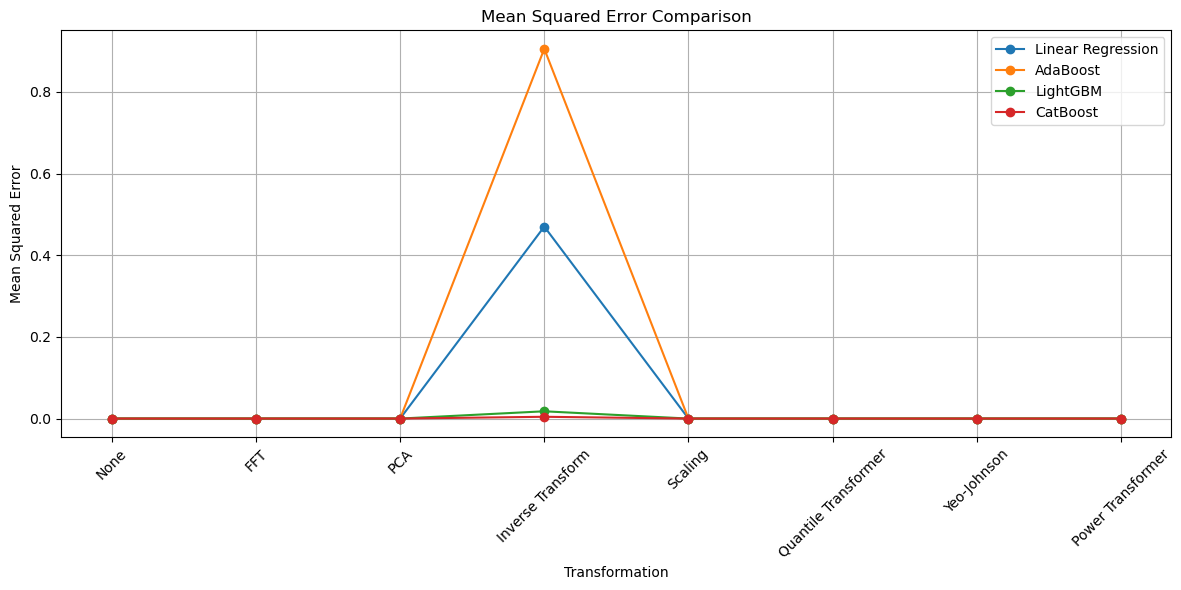

In [144]:
# MSE scores for each model and transformation
mse = [mse_scores_no_transformation, mse_scores_with_fft, mse_scores_with_pca, mse_scores_with_inv, mse_scores_with_ss, mse_scores_with_qt, mse_scores_with_yeo, mse_scores_with_powt]

# Plotting MSE scores
plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    plt.plot(transformations, [scores[i] for scores in mse], marker='o', label=model)
    
plt.title('Mean Squared Error Comparison')
plt.xlabel('Transformation')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
        
